In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mfcc_data_prep import wavFiles, getMFCC, plotMFCC
from LSTM_grid_search import getData
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
def getSpeakerData(speaker: 'str speaker',
                   nmfcc: 'int number of mfccs',
                   centre = True)->'pd dataframe for all triplets for this speaker':
    # intiate a wav obj
    wav_obj = wavFiles('0')
    # get the keys for all groups
    groups = list(wav_obj.group_dict.keys())
    for w in groups:
        wavs = wavFiles(w)
        path = f'/Users/claraliu/Documents/SHaPS_PhD/resyllabification_study/pilot_2/{speaker}/normal_sound_files'
        wavs.get_files(path)
        current_df = getMFCC(wavs, speaker, nmfcc, w)
        if groups.index(w) == 0:
            data = current_df
        else:
            data = pd.concat([data, current_df])
    if centre:
        # cepstral mean subtraction
        scaler = StandardScaler(with_std = False)
        cols = ['c'+ str(x) for x in range(nmfcc)]
        data[cols] = scaler.fit_transform(data[cols])
    return data

In [8]:
speakers = ['DM', 'PC', 'TB', 'JRD', 'KZ']
for s in speakers:
    if s == 'DM':
        centred = getSpeakerData(s, 15, centre = True)
        #not_centred = getSpeakerData(s, 15, centre = False)
    else:
        centred = pd.concat([centred, getSpeakerData(s, 15, centre = True)])
        #not_centred = pd.concat([not_centred, getSpeakerData(s, 15, centre = False)])
centred.to_csv('/Users/claraliu/Documents/SHaPS_PhD/resyllabification_study/chopping_analysis/mfcc_data/centred.txt', 
               sep = '\t', index = False)
#not_centred.to_csv('/Users/claraliu/Documents/SHaPS_PhD/resyllabification_study/chopping_analysis/mfcc_data/not_centred.txt', 
           #sep = '\t', index = False)

In [9]:
centred = pd.read_csv('/Users/claraliu/Documents/SHaPS_PhD/resyllabification_study/chopping_analysis/mfcc_data/centred.txt',
                      sep = '\t')
print(centred.shape)

(120786, 20)


In [11]:
not_centred = pd.read_csv('/Users/claraliu/Documents/SHaPS_PhD/resyllabification_study/chopping_analysis/mfcc_data/not_centred.txt',
                      sep = '\t')
print(not_centred.shape)

(120786, 20)


In [42]:
def subsetTriplets(path: 'str path to folder', df: 'pandas dataframe all speakers data')->None:
    group_dict = wavFiles('0').group_dict
    groups = list(group_dict.keys())
    for g in groups:
        current_group = df[df['Group'] == int(g)]
        o_words = group_dict[g][:2]
        c_words = group_dict[g][2:]
        current_group_o = current_group[current_group['Word'].isin(o_words)]
        current_group_c = current_group[current_group['Word'].isin(c_words)]
        o_path = f'{path}/{g}_o.txt'
        c_path = f'{path}/{g}_c.txt'
        current_group_o.to_csv(o_path, sep = '\t', index = False)
        current_group_c.to_csv(c_path, sep = '\t', index = False)

In [43]:
subsetTriplets('/Users/claraliu/Documents/SHaPS_PhD/resyllabification_study/chopping_analysis/mfcc_data/byTriplet/centred', centred)

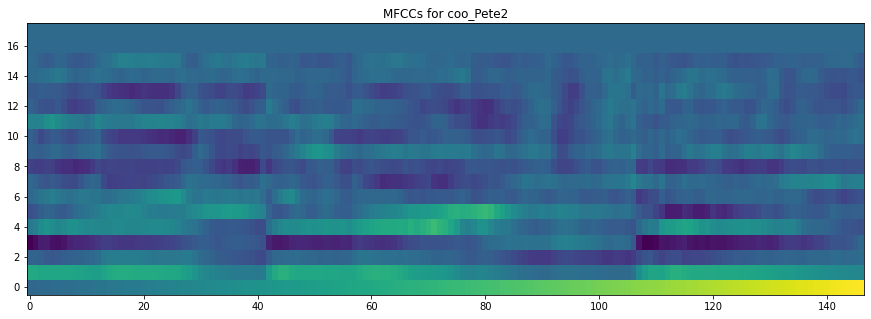

In [17]:
plotMFCC(not_centred, 'coo_Pete', 2, 'TB')